In [88]:
import pandas as pd
import numpy as np

from collections import Counter

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [89]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
label = pd.read_csv('train_label.csv')
data = train.append(test,ignore_index=True)
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011/3/14,Roman,1390,Roman,34.938093,-9.856322,Zahanati,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013/3/6,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013/2/25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013/1/28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011/7/13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [90]:
data.shape

(74250, 40)

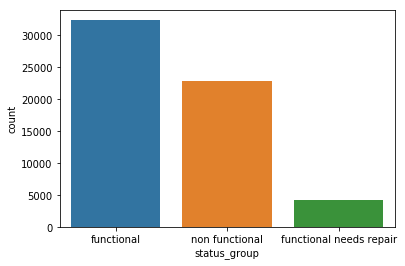

In [91]:
sns.countplot(label['status_group'])

In [92]:
# 删除一些对预处没有帮助的特征
drop_features = ['id','amount_tsh',  'num_private', 'region_code',  'quantity', 'quality_group', 'source_type', 'payment', 
                 'waterpoint_type_group','extraction_type_group','scheme_name']
data = data.drop(drop_features,axis=1)
data.head()

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type
0,2011/3/14,Roman,1390,Roman,34.938093,-9.856322,Zahanati,Lake Nyasa,Mnyusi B,Iringa,...,gravity,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe
1,2013/3/6,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,2013/2/25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,gravity,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,2013/1/28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,2011/7/13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe


In [93]:
# 日期特征
# 将日期特征转换为年、月、日
'date_recorded'
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data['year_recorded'] = data['date_recorded'].apply(lambda x: x.year)
data['month_recorded'] = data['date_recorded'].apply(lambda x: x.month)
data['day_recorded'] = data['date_recorded'].apply(lambda x: x.day)
data = data.drop('date_recorded',axis=1)
data.head()

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,...,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type,year_recorded,month_recorded,day_recorded
0,Roman,1390,Roman,34.938093,-9.856322,Zahanati,Lake Nyasa,Mnyusi B,Iringa,5,...,user-group,annually,soft,enough,spring,groundwater,communal standpipe,2011,3,14
1,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,2,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,2013,3,6
2,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,2013,2,25
3,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,2013,1,28
4,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,2011,7,13


In [94]:
# 建设年份
data['construction_year'] = data['construction_year'].replace(0,data['construction_year'].mean())

In [95]:
# 处理数字特征
nums_features = ['gps_height','longitude','population']
for i in nums_features:
    data[i] = data[i].replace(0,np.NAN).fillna(data[i].mean())
data.head()

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,...,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type,year_recorded,month_recorded,day_recorded
0,Roman,1390.000000,Roman,34.938093,-9.856322,Zahanati,Lake Nyasa,Mnyusi B,Iringa,5,...,user-group,annually,soft,enough,spring,groundwater,communal standpipe,2011,3,14
1,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,2,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,2013,3,6
2,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,2013,2,25
3,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,2013,1,28
4,Action In A,665.667313,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,2011,7,13


In [96]:
# 处理含有none的数值特征
none_features = ['gps_height','longitude','population']
for i in none_features:
    data[i] = data[i].replace(0,np.NAN).fillna(data[i].mean())
data.head()

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,...,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type,year_recorded,month_recorded,day_recorded
0,Roman,1390.000000,Roman,34.938093,-9.856322,Zahanati,Lake Nyasa,Mnyusi B,Iringa,5,...,user-group,annually,soft,enough,spring,groundwater,communal standpipe,2011,3,14
1,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,2,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,2013,3,6
2,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,2013,2,25
3,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,2013,1,28
4,Action In A,665.667313,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,2011,7,13


In [97]:
# 标准化处理数据特征
nor_features = ['gps_height', 'latitude', 'longitude','population']
scaler = StandardScaler()
data[nor_features] = scaler.fit_transform(data[nor_features])
data.head()


,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,...,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type,year_recorded,month_recorded,day_recorded
0,Roman,0.944531,Roman,-0.068900,-1.410738,Zahanati,Lake Nyasa,Mnyusi B,Iringa,5,...,user-group,annually,soft,enough,spring,groundwater,communal standpipe,2011,3,14
1,Grumeti,0.961726,GRUMETI,-0.161828,1.206916,Zahanati,Lake Victoria,Nyamara,Mara,2,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,2013,3,6
2,Lottery Club,-0.400476,World vision,0.910596,0.638531,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,2013,2,25
3,Unicef,-1.208627,UNICEF,1.308789,-1.851824,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,2013,1,28
4,Action In A,-0.439322,Artisan,-1.547225,1.316292,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,2011,7,13


In [98]:
# 处理布尔特征
bool_features = ['public_meeting', 'permit']
for i in bool_features:
    data[i] = data[i].fillna(False).astype('int')

In [99]:
data.columns.values

array(['funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'wpt_name', 'basin', 'subvillage', 'region', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality',
       'quantity_group', 'source', 'source_class', 'waterpoint_type',
       'year_recorded', 'month_recorded', 'day_recorded'], dtype=object)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 31 columns):
funder                   69746 non-null object
gps_height               74250 non-null float64
installer                69718 non-null object
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
basin                    74250 non-null object
subvillage               73780 non-null object
region                   74250 non-null object
district_code            74250 non-null int64
lga                      74250 non-null object
ward                     74250 non-null object
population               74250 non-null float64
public_meeting           74250 non-null int32
recorded_by              74250 non-null object
scheme_management        69404 non-null object
permit                   74250 non-null int32
construction_year        74250 non-null float64
extraction_type          74250 non-null obj

In [101]:
# 处理有缺失的分类特征
miss_features = ['funder','installer','subvillage']
for i in miss_features:
    data[i] = data[i].fillna(method='ffill')

In [102]:
Counter(data['scheme_management'])

Counter({'VWC': 45917,
         'Other': 996,
         nan: 4846,
         'Private operator': 1326,
         'WUG': 6496,
         'Water Board': 3462,
         'WUA': 3551,
         'Water authority': 3975,
         'Company': 1341,
         'Parastatal': 2124,
         'Trust': 92,
         'SWC': 123,
         'None': 1})

In [103]:
data['scheme_management'] = data['scheme_management'].fillna('VWC')

In [104]:
# 处理含有unkonwn的分类特征
unkonwn_features = ['source_class','quantity_group','water_quality','management_group']
for i in unkonwn_features:
    data[i] = data[i].replace('unkonwn',np.NAN).fillna(method='ffill')
data.head()

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,...,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type,year_recorded,month_recorded,day_recorded
0,Roman,0.944531,Roman,-0.068900,-1.410738,Zahanati,Lake Nyasa,Mnyusi B,Iringa,5,...,user-group,annually,soft,enough,spring,groundwater,communal standpipe,2011,3,14
1,Grumeti,0.961726,GRUMETI,-0.161828,1.206916,Zahanati,Lake Victoria,Nyamara,Mara,2,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,2013,3,6
2,Lottery Club,-0.400476,World vision,0.910596,0.638531,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,2013,2,25
3,Unicef,-1.208627,UNICEF,1.308789,-1.851824,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,2013,1,28
4,Action In A,-0.439322,Artisan,-1.547225,1.316292,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,2011,7,13


In [105]:
# 处理含有none的分类特征
data['wpt_name'] = data['wpt_name'].replace('none',np.NAN).fillna(method='ffill')
data.head()

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,...,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type,year_recorded,month_recorded,day_recorded
0,Roman,0.944531,Roman,-0.068900,-1.410738,Zahanati,Lake Nyasa,Mnyusi B,Iringa,5,...,user-group,annually,soft,enough,spring,groundwater,communal standpipe,2011,3,14
1,Grumeti,0.961726,GRUMETI,-0.161828,1.206916,Zahanati,Lake Victoria,Nyamara,Mara,2,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,2013,3,6
2,Lottery Club,-0.400476,World vision,0.910596,0.638531,Kwa Mahundi,Pangani,Majengo,Manyara,4,...,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,2013,2,25
3,Unicef,-1.208627,UNICEF,1.308789,-1.851824,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,...,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,2013,1,28
4,Action In A,-0.439322,Artisan,-1.547225,1.316292,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,2011,7,13


In [106]:
data.shape

(74250, 31)

In [107]:
category_features = ['funder','installer','wpt_name', 'basin', 'subvillage', 'region','lga', 'ward', 'recorded_by','scheme_management', 
                     'extraction_type', 'extraction_type_class', 'management','management_group', 'payment_type', 'water_quality',
                     'quantity_group','source', 'source_class', 'waterpoint_type']
data[category_features].isnull().sum()

funder                   0
installer                0
wpt_name                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
recorded_by              0
scheme_management        0
extraction_type          0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quantity_group           0
source                   0
source_class             0
waterpoint_type          0
dtype: int64

In [108]:
Counter(data['funder'])

Counter({'Roman': 357,
         'Grumeti': 72,
         'Lottery Club': 9,
         'Unicef': 1415,
         'Action In A': 1,
         'Mkinga Distric Coun': 196,
         'Dwsp': 1075,
         'Rwssp': 1818,
         'Wateraid': 440,
         'Isingiro Ho': 17,
         'Private': 405,
         'Danida': 4150,
         'World Vision': 1667,
         'Lawatefuka Water Supply': 243,
         'Biore': 38,
         'Rudep': 419,
         'Hesawa': 2948,
         'Twe': 121,
         'Isf': 412,
         'African Development Bank': 50,
         'Government Of Tanzania': 12042,
         'Sobodo': 1,
         'Water': 781,
         'Private Individual': 1100,
         'Undp': 106,
         'Not Known': 34,
         'Kirde': 73,
         'Cefa': 91,
         'Ces(gmbh)': 335,
         'European Union': 72,
         'Lga': 585,
         'District Council': 1087,
         'Muwsa': 141,
         'Dwe/norad': 73,
         'Kkkt_makwale': 222,
         'Sawaka': 2,
         'Ces (gmbh)': 229,
  

In [109]:
Counter(data['installer'])

Counter({'Roman': 119,
         'GRUMETI': 57,
         'World vision': 548,
         'UNICEF': 304,
         'Artisan': 180,
         'DWE': 23206,
         'DWSP': 254,
         'Water Aid': 62,
         'Private': 197,
         'DANIDA': 1391,
         'Lawatefuka water sup': 243,
         'WEDECO': 533,
         'Danid': 101,
         'TWE': 145,
         'ISF': 179,
         'Kilolo Star': 2,
         'District council': 510,
         'Water': 89,
         'WU': 400,
         'Not known': 23,
         'Central government': 811,
         'CEFA': 106,
         'Commu': 1422,
         'Accra': 42,
         'World Vision': 351,
         'LGA': 542,
         'MUWSA': 140,
         'KKKT _ Konde and DWE': 223,
         'Government': 2417,
         'Olgilai village community': 18,
         'KKKT': 1184,
         'RWE': 1606,
         'Adra /Community': 63,
         'SEMA': 333,
         'SHIPO': 203,
         'HESAWA': 713,
         'ACRA': 380,
         'Community': 731,
         'IFAD'

In [110]:
Counter(data['wpt_name'])

Counter({'Zahanati': 1108,
         'Kwa Mahundi': 4,
         'Zahanati Ya Nanyumbu': 2,
         'Shuleni': 2324,
         'Tajiri': 1,
         'Kwa Ngomho': 1,
         'Tushirikiane': 4,
         'Kwa Ramadhan Musa': 1,
         'Kwapeto': 1,
         'Mzee Hokororo': 1,
         'Kwa Alid Nchimbi': 1,
         'Pamba': 5,
         'Kwa John Izack Mmari': 1,
         'Mwabasabi': 17,
         "Kwa Juvenal Ching'Ombe": 1,
         'Kwa John Mtenzi': 1,
         'Kwa Rose Chaula': 1,
         'Ngomee': 3,
         'Muungano': 167,
         'Kinonga': 1,
         'Kamsasa': 1,
         'Kwa Tukai': 1,
         'Ruhoma Primary School': 1,
         'Kwawilliam': 3,
         'Kwa Kibakaya': 1,
         'Kwa Willium Kinda': 1,
         'Ngosi': 1,
         'Kituo Cha Maziwa': 1,
         'Kwa Philip Lyimo': 2,
         'Msikitini Wa Ijumaa': 1,
         'Sekondari': 187,
         'Office Ya Kijiji': 32,
         'Tangi': 3,
         'Mkuyuni': 110,
         'Kwa Lusina': 2,
         'Zah

In [111]:
Counter(data['basin'])

Counter({'Lake Nyasa': 6332,
         'Lake Victoria': 12871,
         'Pangani': 11143,
         'Ruvuma / Southern Coast': 5587,
         'Internal': 9642,
         'Lake Tanganyika': 8052,
         'Wami / Ruvu': 7577,
         'Rufiji': 9987,
         'Lake Rukwa': 3059})

In [112]:
Counter(data['subvillage'])

Counter({'Mnyusi B': 6,
         'Nyamara': 6,
         'Majengo': 636,
         'Mahakamani': 24,
         'Kyanyamisa': 2,
         'Moa/Mwereme': 1,
         'Ishinabulandi': 4,
         'Nyawishi Center': 2,
         'Imalauduki': 7,
         'Mkonomre': 1,
         'Mizugo': 2,
         'Ngondombwito': 3,
         'Nkilifa': 5,
         'Omarini': 9,
         'Mwabasabi': 50,
         'Tunzi': 7,
         'Kidudumo': 4,
         'Yeriko': 17,
         'Center': 97,
         'Manyanya': 12,
         'Ibabachegu': 1,
         'Mkanivega': 3,
         'Mkonga Juu': 11,
         'Msasa': 22,
         'Kitereni': 3,
         'Shuleni': 650,
         'Chakahaya': 7,
         'Kiyao': 2,
         'Merali': 6,
         'Karume': 33,
         'Kudipera': 10,
         'Mosheni': 4,
         'Lupanga A': 15,
         'Kilombero B': 1,
         'Afya': 34,
         'Ndanganyika': 5,
         'Baura': 4,
         'Mwanzala': 5,
         'Nyabwai B': 1,
         'Reli B': 5,
         'Kilunduwe

In [113]:
Counter(data['region'])

Counter({'Iringa': 6599,
         'Mara': 2451,
         'Manyara': 1972,
         'Mtwara': 2144,
         'Kagera': 4174,
         'Tanga': 3186,
         'Shinyanga': 6293,
         'Tabora': 2466,
         'Pwani': 3331,
         'Ruvuma': 3306,
         'Kilimanjaro': 5494,
         'Rukwa': 2242,
         'Mwanza': 3897,
         'Kigoma': 3533,
         'Lindi': 1920,
         'Dodoma': 2779,
         'Arusha': 4111,
         'Mbeya': 5758,
         'Singida': 2536,
         'Morogoro': 5038,
         'Dar es Salaam': 1020})

In [114]:
Counter(data['lga'])

Counter({'Ludewa': 687,
         'Serengeti': 905,
         'Simanjiro': 372,
         'Nanyumbu': 213,
         'Karagwe': 967,
         'Mkinga': 347,
         'Shinyanga Rural': 751,
         'Kahama': 1058,
         'Tabora Urban': 195,
         'Mkuranga': 698,
         'Namtumbo': 845,
         'Maswa': 1024,
         'Siha': 550,
         'Meatu': 584,
         'Sumbawanga Rural': 641,
         'Njombe': 3128,
         'Ukerewe': 442,
         'Bariadi': 1485,
         'Same': 1106,
         'Kigoma Rural': 1015,
         'Moshi Rural': 1566,
         'Lindi Rural': 471,
         'Rombo': 747,
         'Chamwino': 439,
         'Bagamoyo': 1263,
         'Mafia': 170,
         'Arusha Rural': 1521,
         'Kyela': 1070,
         'Kondoa': 644,
         'Kilolo': 434,
         'Kibondo': 1101,
         'Makete': 789,
         'Singida Rural': 1202,
         'Masasi': 649,
         'Rungwe': 1381,
         'Moshi Urban': 103,
         'Geita': 603,
         'Mbulu': 385,
       

In [115]:
Counter(data['ward'])

Counter({'Mundindi': 41,
         'Natta': 90,
         'Ngorika': 13,
         'Nanyumbu': 41,
         'Nyakasimbi': 14,
         'Moa': 34,
         'Samuye': 90,
         'Chambo': 41,
         'Itetemia': 39,
         'Kaisho': 59,
         'Tambani': 68,
         'Msindo': 243,
         'Busilili': 88,
         'Siha Kaskazini': 70,
         'Nkoma': 161,
         'Mkowe': 37,
         'Mdandu': 292,
         'Usuka': 222,
         'Ilangala': 34,
         'Mawengi': 76,
         'Matola': 177,
         'Ikungulyabashashi': 26,
         'Kisiwani': 53,
         'Mkigo': 68,
         'Kimochi': 133,
         'Rutamba': 9,
         'Nyaishozi': 60,
         'Mengwe Manda': 43,
         'Siha Kati': 297,
         'Dabalo': 31,
         'Chalinze': 238,
         'Kilema  Kati': 11,
         'Lupanga': 51,
         'Baleni': 30,
         'Oltrumet': 62,
         'Katumbasongwe': 69,
         'Mnenia': 35,
         "Boma la ng'ombe": 93,
         'Rugongowe': 84,
         'Kahe': 78,
 

In [116]:
Counter(data['scheme_management'])

Counter({'VWC': 50763,
         'Other': 996,
         'Private operator': 1326,
         'WUG': 6496,
         'Water Board': 3462,
         'WUA': 3551,
         'Water authority': 3975,
         'Company': 1341,
         'Parastatal': 2124,
         'Trust': 92,
         'SWC': 123,
         'None': 1})

In [117]:
Counter(data['extraction_type'])

Counter({'gravity': 33263,
         'submersible': 5982,
         'swn 80': 4588,
         'nira/tanira': 10205,
         'india mark ii': 3029,
         'other': 8102,
         'ksb': 1790,
         'mono': 3628,
         'windmill': 152,
         'afridev': 2208,
         'other - rope pump': 572,
         'india mark iii': 135,
         'other - swn 81': 284,
         'other - play pump': 101,
         'cemo': 108,
         'climax': 41,
         'walimi': 60,
         'other - mkulima/shinyanga': 2})

In [118]:
# 处理低频值
# low_feq_feature = ['funder','installer','wpt_name','ward']
cols = [i for i in data.columns if type(data[i].iloc[0]) == str]
print(cols)
data[cols].where(data[cols].apply(lambda x: x.map(x.value_counts())) > 100, "other")

['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by', 'scheme_management', 'extraction_type', 'extraction_type_class', 'management', 'management_group', 'payment_type', 'water_quality', 'quantity_group', 'source', 'source_class', 'waterpoint_type']


,funder,installer,wpt_name,basin,subvillage,region,lga,ward,recorded_by,scheme_management,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quantity_group,source,source_class,waterpoint_type
0,Roman,Roman,Zahanati,Lake Nyasa,other,Iringa,Ludewa,other,GeoData Consultants Ltd,VWC,gravity,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe
1,other,other,Zahanati,Lake Victoria,other,Mara,Serengeti,other,GeoData Consultants Ltd,Other,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,other,World vision,other,Pangani,Majengo,Manyara,Simanjiro,other,GeoData Consultants Ltd,VWC,gravity,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,Unicef,UNICEF,other,Ruvuma / Southern Coast,other,Mtwara,Nanyumbu,other,GeoData Consultants Ltd,VWC,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,other,Artisan,Shuleni,Lake Victoria,other,Kagera,Karagwe,other,GeoData Consultants Ltd,VWC,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
5,Mkinga Distric Coun,DWE,other,Pangani,other,Tanga,Mkinga,other,GeoData Consultants Ltd,VWC,submersible,submersible,vwc,user-group,per bucket,salty,enough,other,unknown,communal standpipe multiple
6,Dwsp,DWSP,other,Internal,other,Shinyanga,Shinyanga Rural,other,GeoData Consultants Ltd,VWC,swn 80,handpump,vwc,user-group,never pay,soft,enough,machine dbh,groundwater,hand pump
7,Rwssp,DWE,other,Lake Tanganyika,other,Shinyanga,Kahama,other,GeoData Consultants Ltd,VWC,nira/tanira,handpump,wug,user-group,unknown,milky,enough,shallow well,groundwater,hand pump
8,Wateraid,other,other,Lake Tanganyika,other,Tabora,Tabora Urban,other,GeoData Consultants Ltd,VWC,india mark ii,handpump,vwc,user-group,never pay,salty,seasonal,machine dbh,groundwater,hand pump
9,other,Artisan,other,Lake Victoria,other,Kagera,Karagwe,other,GeoData Consultants Ltd,VWC,nira/tanira,handpump,vwc,user-group,never pay,soft,enough,shallow well,groundwater,hand pump


In [119]:
data.shape

(74250, 31)

In [120]:
# ['funder','installer','wpt_name','ward', 'subvillage']
category_features = ['basin','region', 'lga','recorded_by',
                     'scheme_management', 'extraction_type', 'extraction_type_class', 'management', 'management_group', 
                     'payment_type', 'water_quality', 'quantity_group', 'source', 'source_class', 'waterpoint_type']
for feature in category_features:
    features = pd.DataFrame()
    features = pd.get_dummies(data[feature],prefix=feature)
    data = pd.concat([data,features],axis=1)
    data = data.drop(feature,axis=1)
data.shape

(74250, 266)

In [121]:
# 查看各个特征与标签之间的相关性
label_mapDict = {'functional':1,'non functional':-1,'functional needs repair':0}
label['status_group'] = label['status_group'].map(label_mapDict)

data['status_group'] = label['status_group']

corrDf = data.corr()
corrDf

,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year_recorded,month_recorded,...,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group
gps_height,1.000000,-0.289111,0.116122,-0.271551,-0.016016,0.045110,0.037146,0.306529,0.195166,-0.065359,...,0.011664,-0.019715,0.028387,0.209100,-0.036661,-0.002811,-0.144013,0.027257,-0.103181,0.128758
longitude,-0.289111,1.000000,-0.306003,0.253195,-0.024521,0.018421,0.021034,0.461824,0.109852,-0.383227,...,-0.056795,0.041697,0.022601,0.141924,0.033158,0.010645,-0.163608,-0.148971,0.030062,-0.004995
latitude,0.116122,-0.306003,1.000000,-0.200048,0.014547,-0.034749,0.070131,-0.246883,0.159171,0.320875,...,-0.049413,0.020699,0.029218,-0.169395,0.022561,0.003534,0.100601,0.105288,0.060221,0.014547
district_code,-0.271551,0.253195,-0.200048,1.000000,0.047438,0.022621,-0.047462,0.048069,0.013516,-0.108562,...,-0.053153,0.005340,-0.005020,-0.077927,0.035724,0.000938,0.001741,-0.029942,0.099601,-0.065687
population,-0.016016,-0.024521,0.014547,0.047438,1.000000,-0.003898,-0.050242,0.096611,0.065070,-0.056358,...,0.019496,-0.006923,0.048146,-0.099779,0.050558,0.025491,0.062037,0.017112,0.006034,0.015227
public_meeting,0.045110,0.018421,-0.034749,0.022621,-0.003898,1.000000,0.140884,0.005651,-0.113226,-0.067079,...,-0.014828,-0.016391,0.012235,0.060713,0.031271,0.000489,-0.045523,0.033419,-0.075395,0.072349
permit,0.037146,0.021034,0.070131,-0.047462,-0.050242,0.140884,1.000000,0.080348,-0.002934,0.054175,...,0.105409,0.015717,-0.000122,0.100689,0.015655,0.004811,-0.097217,0.002562,-0.035659,0.028164
construction_year,0.306529,0.461824,-0.246883,0.048069,0.096611,0.005651,0.080348,1.000000,0.352382,-0.501913,...,0.096330,0.012173,0.003950,0.200233,0.027577,0.002146,-0.198278,-0.041845,-0.043436,0.047883
year_recorded,0.195166,0.109852,0.159171,0.013516,0.065070,-0.113226,-0.002934,0.352382,1.000000,-0.303208,...,-0.024924,-0.015986,0.030053,-0.052620,0.121556,-0.005876,-0.060008,-0.009427,0.053362,-0.020372
month_recorded,-0.065359,-0.383227,0.320875,-0.108562,-0.056358,-0.067079,0.054175,-0.501913,-0.303208,1.000000,...,-0.032664,-0.013247,-0.008728,-0.134075,-0.052130,-0.001734,0.157365,0.027677,0.026862,-0.024079


In [123]:
corrDf['status_group'].sort_values(ascending=False)[:100]

status_group                          1.000000
quantity_group_enough                 0.258402
waterpoint_type_communal standpipe    0.165314
region_Iringa                         0.141223
extraction_type_gravity               0.134059
extraction_type_class_gravity         0.134059
gps_height                            0.128758
water_quality_soft                    0.127763
payment_type_monthly                  0.116186
payment_type_annually                 0.111307
payment_type_per bucket               0.107686
source_spring                         0.107233
lga_Njombe                            0.106527
extraction_type_class_handpump        0.105952
extraction_type_nira/tanira           0.104755
management_water board                0.098677
waterpoint_type_hand pump             0.092294
scheme_management_Water Board         0.087127
scheme_management_WUA                 0.073250
public_meeting                        0.072349
management_private operator           0.070453
basin_Rufiji 

In [161]:
# functional - 水点正常运行，无需维修                                1
# functional needs repair - 水点正在运行，但需要维修                 0  
# non functional - 水点无法运作

label = pd.read_csv('train_label.csv')

status_groupDf = pd.DataFrame()
status_groupDf= pd.get_dummies(label['status_group'],prefix='status_group')
label = pd.concat([label,status_groupDf],axis=1)


train_Y = label[['status_group_functional','status_group_functional needs repair','status_group_non functional']].values
# train_Y.shape
train_Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [125]:
selected_features = ['quantity_group_enough'                 
,'waterpoint_type_communal standpipe'    
,'region_Iringa'                         
,'extraction_type_gravity'               
,'extraction_type_class_gravity'         
,'gps_height'                            
,'water_quality_soft'                    
,'payment_type_monthly'                  
,'payment_type_annually'                 
,'payment_type_per bucket'               
,'source_spring'                         
,'lga_Njombe'                            
,'extraction_type_class_handpump'        
,'extraction_type_nira/tanira'           
,'management_water board'                
,'waterpoint_type_hand pump'             
,'scheme_management_Water Board'         
,'scheme_management_WUA'                 
,'public_meeting'                        
,'management_private operator'           
,'basin_Rufiji'                          
,'lga_Makete'                            
,'region_Arusha'                         
,'management_wua'                        
,'lga_Siha'                              
,'lga_Hai'                               
,'basin_Lake Nyasa'                      
,'lga_Karatu'                            
,'management_wug'                        
,'source_river'                          
,'construction_year'                     
,'waterpoint_type_improved spring'       
,'lga_Arusha Rural'                      
,'payment_type_on failure'               
,'lga_Babati'                            
,'basin_Pangani'                         
,'lga_Bagamoyo'                          
,'lga_Ludewa'                            
,'lga_Iringa Rural'                      
,'scheme_management_WUG'                 
,'extraction_type_afridev'               
,'source_rainwater harvesting'           
,'region_Kilimanjaro'                    
,'scheme_management_Private operator'    
,'lga_Rungwe'                            
,'lga_Mkinga'                            
,'lga_Kwimba'                            
,'lga_Kasulu'                           
,'permit']

In [139]:
train_size = len(train)
print(train_size)
train_data = data[:train_size].values

print(train_data.shape)
print(train_Y.shape)


train_X,test_X,train_y,test_y = train_test_split(train_data,train_Y,test_size=0.2,random_state=42)
print('训练集大小:',train_X.shape)
print('训练集合标签大小:',train_y.shape)
print('测试集大小',test_X.shape)
print('测试集标签大小:',train_y.shape)

59400
(59400, 262)
(59400, 3)
训练集大小: (47520, 262)
训练集合标签大小: (47520, 3)
测试集大小 (11880, 262)
测试集标签大小: (47520, 3)


In [137]:
['funder','installer','wpt_name','ward','subvillage']
data = data.drop('subvillage',axis=1)

In [138]:
data.head()

,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year_recorded,month_recorded,...,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group
0,0.944531,-0.068900,-1.410738,5,-0.302125,1,0,1999.00000,2011,3,...,0,0,0,1,0,0,0,0,0,1.0
1,0.961726,-0.161828,1.206916,2,0.074775,0,1,2010.00000,2013,3,...,1,0,0,1,0,0,0,0,0,1.0
2,-0.400476,0.910596,0.638531,4,0.008653,1,1,2009.00000,2013,2,...,1,0,0,0,1,0,0,0,0,1.0
3,-1.208627,1.308789,-1.851824,63,-0.414533,1,1,1986.00000,2013,1,...,0,0,0,0,1,0,0,0,0,-1.0
4,-0.439322,-1.547225,1.316292,1,-0.143979,1,1,1298.46365,2011,7,...,1,0,0,1,0,0,0,0,0,1.0


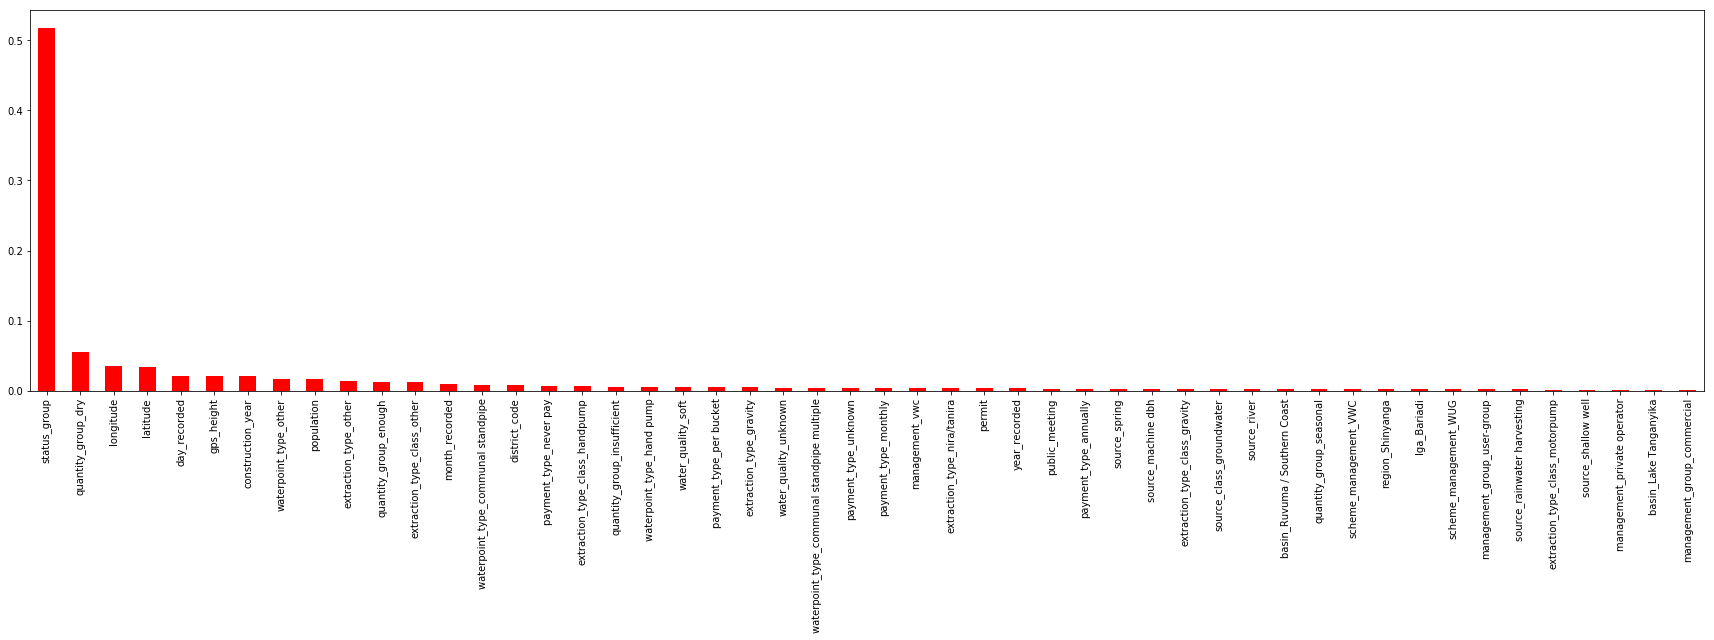

In [140]:
# 使用随机森林选择特征
rfg = RandomForestClassifier()
rfg.fit(train_X, train_y)
# print(rfg.feature_importances_)
plt.figure(figsize=(30, 7))
features = pd.Series(rfg.feature_importances_, index= data.columns)
features.nlargest(50).plot(kind = 'bar', color = 'r')
plt.show()

In [142]:
print(len(list(train_X)))
print(features.nlargest(70))
features.nlargest(70).index

47520
status_group                                   0.516945
quantity_group_dry                             0.055039
longitude                                      0.035348
latitude                                       0.033487
day_recorded                                   0.020623
gps_height                                     0.020557
construction_year                              0.020470
waterpoint_type_other                          0.017471
population                                     0.016348
extraction_type_other                          0.013755
quantity_group_enough                          0.012896
extraction_type_class_other                    0.011982
month_recorded                                 0.009068
waterpoint_type_communal standpipe             0.008860
district_code                                  0.008840
payment_type_never pay                         0.007113
extraction_type_class_handpump                 0.006870
quantity_group_insufficient               

Index(['status_group', 'quantity_group_dry', 'longitude', 'latitude',
       'day_recorded', 'gps_height', 'construction_year',
       'waterpoint_type_other', 'population', 'extraction_type_other',
       'quantity_group_enough', 'extraction_type_class_other',
       'month_recorded', 'waterpoint_type_communal standpipe', 'district_code',
       'payment_type_never pay', 'extraction_type_class_handpump',
       'quantity_group_insufficient', 'waterpoint_type_hand pump',
       'water_quality_soft', 'payment_type_per bucket',
       'extraction_type_gravity', 'water_quality_unknown',
       'waterpoint_type_communal standpipe multiple', 'payment_type_unknown',
       'payment_type_monthly', 'management_vwc', 'extraction_type_nira/tanira',
       'permit', 'year_recorded', 'public_meeting', 'payment_type_annually',
       'source_spring', 'source_machine dbh', 'extraction_type_class_gravity',
       'source_class_groundwater', 'source_river',
       'basin_Ruvuma / Southern Coast', 'qua

In [143]:
selected_features = [ 'quantity_group_dry', 'longitude', 'latitude',
       'day_recorded', 'gps_height', 'construction_year',
       'waterpoint_type_other', 'population', 'extraction_type_other',
       'quantity_group_enough', 'extraction_type_class_other',
       'month_recorded', 'waterpoint_type_communal standpipe', 'district_code',
       'payment_type_never pay', 'extraction_type_class_handpump',
       'quantity_group_insufficient', 'waterpoint_type_hand pump',
       'water_quality_soft', 'payment_type_per bucket',
       'extraction_type_gravity', 'water_quality_unknown',
       'waterpoint_type_communal standpipe multiple', 'payment_type_unknown',
       'payment_type_monthly', 'management_vwc', 'extraction_type_nira/tanira',
       'permit', 'year_recorded', 'public_meeting', 'payment_type_annually',
       'source_spring', 'source_machine dbh', 'extraction_type_class_gravity',
       'source_class_groundwater', 'source_river',
       'basin_Ruvuma / Southern Coast', 'quantity_group_seasonal',
       'scheme_management_VWC', 'region_Shinyanga', 'lga_Bariadi',
       'scheme_management_WUG', 'management_group_user-group',
       'source_rainwater harvesting', 'extraction_type_class_motorpump',
       'source_shallow well', 'management_private operator',
       'basin_Lake Tanganyika', 'management_group_commercial',
       'source_class_surface', 'region_Iringa', 'extraction_type_submersible',
       'water_quality_salty', 'region_Rukwa', 'basin_Internal',
       'extraction_type_swn 80', 'extraction_type_class_submersible',
       'region_Kigoma', 'basin_Lake Nyasa', 'payment_type_on failure',
       'basin_Rufiji', 'lga_Kigoma Rural', 'region_Kilimanjaro',
       'region_Morogoro', 'extraction_type_ksb',
       'waterpoint_type_improved spring', 'region_Mtwara',
       'basin_Lake Victoria', 'management_wug']

In [145]:
train_size = len(train)
print(train_size)
train_data = data[selected_features][:train_size].values

print(train_data.shape)
print(train_Y.shape)


train_X,test_X,train_y,test_y = train_test_split(train_data,train_Y,test_size=0.1,random_state=42)
print('训练集大小:',train_X.shape)
print('训练集合标签大小:',train_y.shape)
print('测试集大小',test_X.shape)
print('测试集标签大小:',train_y.shape)

59400
(59400, 69)
(59400, 3)
训练集大小: (53460, 69)
训练集合标签大小: (53460, 3)
测试集大小 (5940, 69)
测试集标签大小: (53460, 3)


In [154]:
pred_X = data[selected_features][train_size:].values
print('预测集大小:',pred_X.shape)

预测集大小: (14850, 69)


In [176]:
# 模型
model = RandomForestClassifier(n_estimators=181,max_depth=19,max_features=15,min_samples_leaf=2)
model.fit(train_X,train_y)

print(model.score(train_X,train_y))
print(model.score(test_X,test_y))

0.8609240553684998
0.789057239057239


In [175]:
# 调参
model = RandomForestClassifier(n_estimators=181,max_depth=19,max_features=15,min_samples_leaf=2)
# model.fit(train_X,train_y)
# print(model.score(train_X,train_y))
# print(model.score(test_X,test_y))

param_test = {
    #'n_estimators':range(1,201,10),  
    #'max_depth':range(10,20,1),          
    #'max_features':range(10,20,1),
    # 'min_samples_leaf':[1,2,3,4,5], 
    #'min_samples_split':[2,4,6,8],
}

gsearch1 = GridSearchCV(estimator=model,param_grid=param_test,scoring='roc_auc',cv=10)
gsearch1.fit(train_X,train_y)
print(gsearch1.best_params_)
print(gsearch1.best_estimator_)
print(gsearch1.best_score_)
print(gsearch1.best_index_)
print('best accuracy:%f' % gsearch1.best_score_)

{'min_samples_leaf': 2}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9060332905369153
1
best accuracy:0.906033


In [165]:
pred = model.predict(pred_X)
pred = pred.astype(int)
pred[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [170]:
# ['functional','functional needs repair','non functional']
source_label = pd.DataFrame(data=pred,columns=['functional','functional needs repair','non functional'])

def get_classes(row):
    for c in source_label.columns:
        if row[c]==1:
            return c

# df.apply(get_classes, axis=1) 

df = pd.DataFrame()
df['id'] = test['id'].values
df['status_group'] = source_label.apply(get_classes, axis=1)
df.to_csv('Data_Mining_the_Water_Table_rfg.csv',index=False)

In [177]:
# submission_format = pd.read_csv('SubmissionFormat.csv',index_col='id')
# my_submission = pd.DataFrame(data=pred,
#                              columns=submission_format.columns,
#                              index=submission_format.index)
# my_submission.to_csv('my_submission_lr.csv'）